In [1]:
# modul umum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train dan test data
from sklearn.model_selection import train_test_split

# scalling data untuk numerik
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# feature engineering untuk kategori
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # one hot encoder (nominal & ordinal) & label encoder (nominal)
#import category_encoders as ce # binary encoder (nominal) & ordinal encode (ordinal)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# algoritma klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# algoritma regresi
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

# evaluasi model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score,recall_score, precision_score, accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import plot_confusion_matrix

# menghilangkan informasi warning
import warnings
warnings.filterwarnings('ignore')

# **Problem Framing**

- Dataset yang digunakan memuat informasi perihal sewa perhotelan yang terdiri dari kategori usia, kategori hotel, keterangan waktu masuk dan keluar, keterangan reservasi, keterangan status sewa, dan lain-lain.

- Objectif yang hendak dicapai dari analisis data ini adalah mengetahui ketersedian kamar dari suatu hotel yang diketahui dari status cancel booking, sehingga harapannya dapat dijadikan sebagai acuan dalam pengambilan keputusan dalam bisnis ke depannya.

- Pada pemodelan mesin learning ini menggunakan beberapa jenis supervised learning, yaitu klasifikasi sehingga output yang dihasilkan adalah klasifikasi status cancel boking hotel yang diolah dari beberapa fitur.

- Setelah model dibuat, maka untuk melakukan pengujian dari model tersebut adalah dengan menggunakan evaluasi model, seperti classificatin report, accuray, dan confession matrix yang kemudian dipilih nilai terbaik dari salah satu model yang telah dibuat untuk dijadikan rekomendasi dari model mesin learning dalam penerapan kasus ini.

In [2]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **Exploratory Data Analysis**

Untuk meilihat hubungan dari tiap fitur maka dibuat beberapa jenis diagram

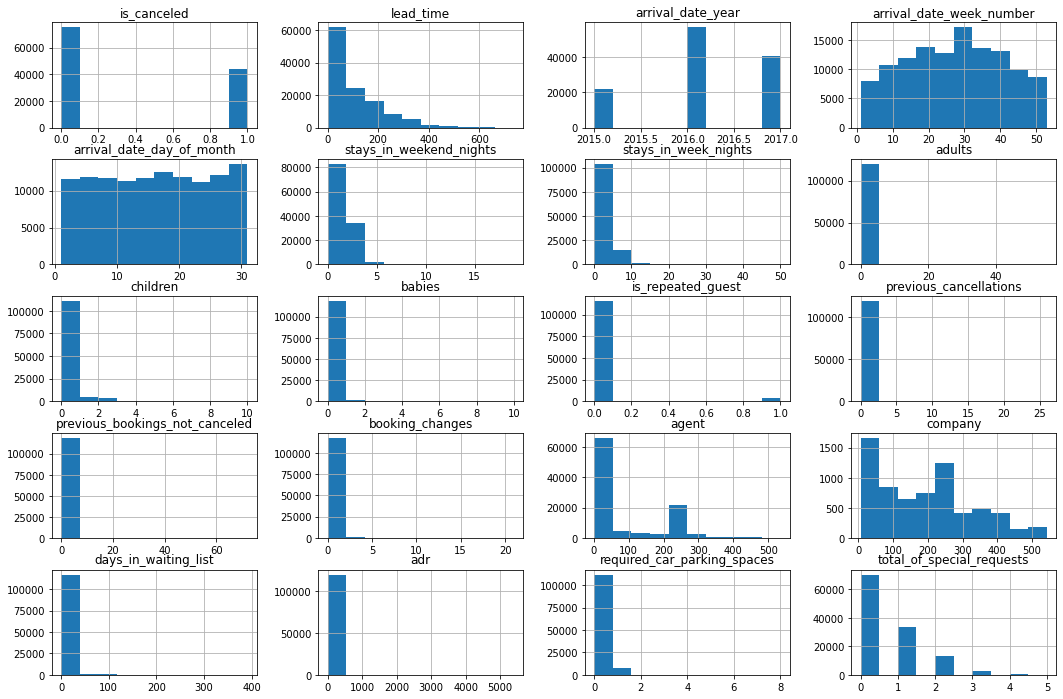

In [10]:
df.hist(figsize=(18,12))
plt.show()
# mengatuhai distribusi data numerik

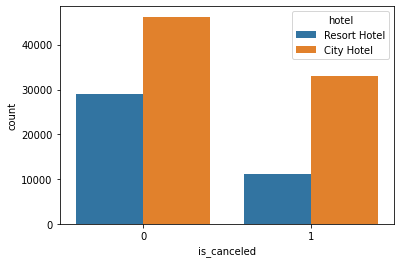

In [11]:
sns.countplot(x='is_canceled', hue = 'hotel', data=df)
plt.show()
# mengetahui jumlah status cancel booking di setiap hotel

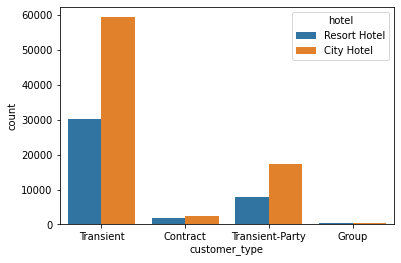

In [12]:
sns.countplot(x='customer_type',hue = 'hotel', data=df)
plt.show()
# mengetahui jumlah customer type di setiap hotel

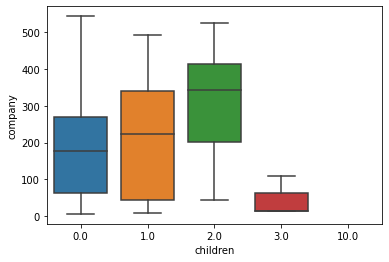

In [13]:
sns.boxplot(x='children', y='company',data=df)
plt.show()
# mengatahui pengunjung, yaitu anak dari tiap company

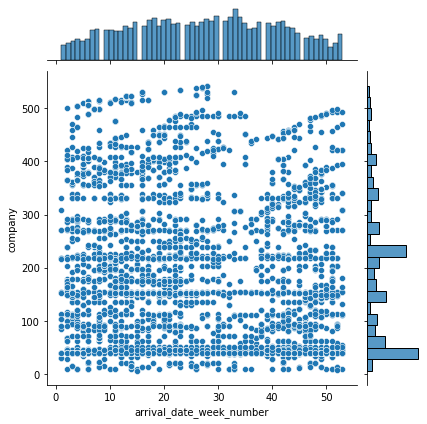

In [14]:
sns.jointplot(x='arrival_date_week_number', y= 'company', data=df)
plt.show()
# mengetahui hubungan waktu kedatangan terhdap jumlah company 

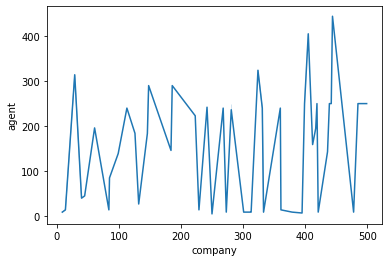

In [15]:
sns.lineplot(x='company',y='agent',data=df)
plt.show()
# mengatahui hubungan jumlah agent terhadap company

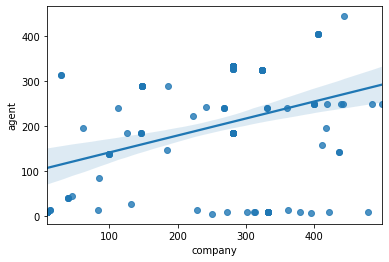

In [16]:
sns.regplot(x='company',y='agent',data=df)
plt.show()

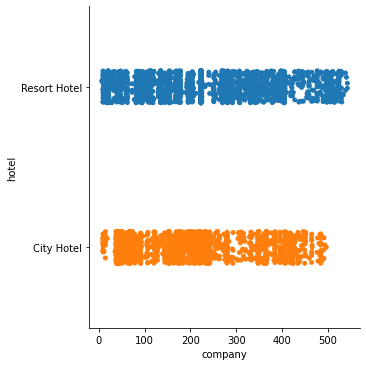

In [17]:
sns.catplot(x='company',y='hotel',data=df)
plt.show()
# mengetahui kategori dari tiap hotel terhadap jumlah company

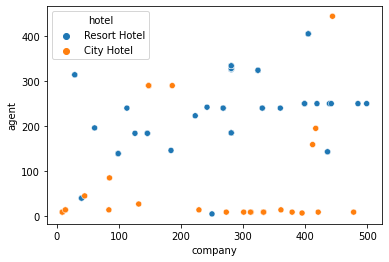

In [18]:
sns.scatterplot(x='company',y='agent',hue= 'hotel', data=df)
plt.show()

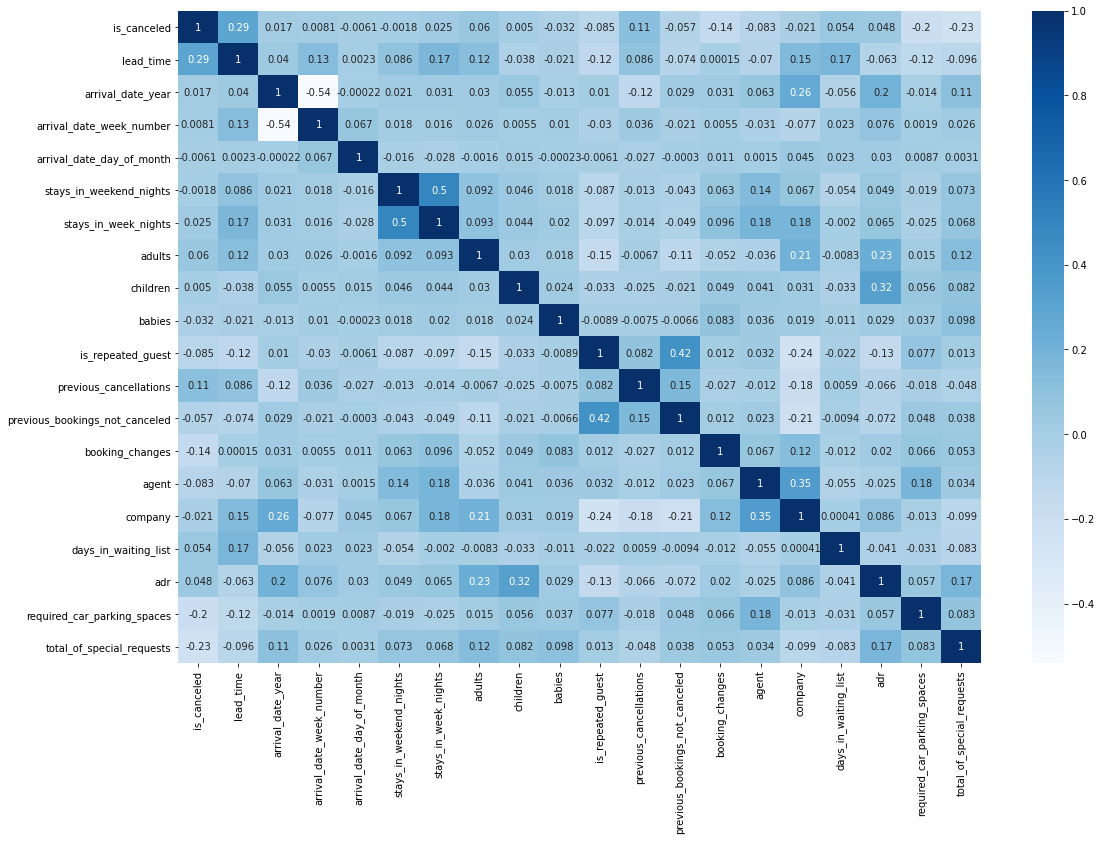

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()
# mengathui korelasi tiap fitur, nilai semakin positif semaikin baik korrelasinya

# **Data Preparation**

- Terdapat 4 kolom yang memiliki nul values, 3 kolom dilakukan drop karena memiliki null values yang banyak dan 1 kolom diisi dengan rata rata pada kolom tersebut.

- 3 kolom tersebut adalah 'country' (488), 'agent' (16340), 'company' (112593).
                      
- 1 kolom tersebut adalah 'children'(4).

In [20]:
df = df.drop(['country','agent','company'], axis=1)
df['children'] = df['children'].fillna(df['children'].mean())
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Cek nlai unik pada kolom kategori, seperti 'hotel', 'deposit_type', dan 'arrival_date_month'.

In [21]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [22]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

Melakukan pemilihan kolom kategori yang selanjutnya akan dilakukan encoding dengan feature engineering

In [23]:
list_c = list(df.columns)

list_cat = []
for i in list_c:
    if df[i].dtype=='object':
        list_cat.append(i)
list_cat

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

- Pada encoding dengan feature engineering dipilih menggunakan tipe label encoding.

- Hal ini dikarenakan berjenis kolom kategori dan memiliki nilai unik yang cukup banyak pada beberapa kolom.

In [24]:
le = LabelEncoder()

for i in list_cat:
    df[i]=le.fit_transform(df[i])

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,3,0,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,4,0,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,0.0,0,0,5,3,0,0,0,0,0,0,0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,0.0,0,0,6,3,0,0,0,4,4,0,0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,0.0,0,0,6,3,0,0,0,3,3,0,0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,104.40,0,0,1,920


- Melakukan pemisahan variabel, y sebagai target adalah kolom 'is_canceled' dan x sebagai fitur adalah selain kolom 'is_canceled'.

- Untuk split data menggunakan 80 % train dan 20 % test data serta stratifikasi pada kolom y 

In [25]:
X =df.drop('is_canceled',axis=1)
y =df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 28), (23878, 28), (95512,), (23878,))

# **Model Training, Model Evaluation, dan Model Tuning**

- Klasifikasi yang digunakan adalah logistic regresion, knn, dan random forest.

- Logistic regression untuk memperkirakan parameer model regresi biner.

- KNN untuk menenetukan kedekatan antara titik-titik tetangga.

- Random forest untuk meningkatkan akurasi prediksi dengan menggunakan rata-rata

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print('Classification Report: ')
print(classification_report(y_test, y_pred_lr))
print('Confussion Matrix: ')
print(confusion_matrix(y_test, y_pred_lr))
print('')
print('Nilai Akurasi: ',acc_lr)

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     15033
           1       0.77      0.66      0.71      8845

    accuracy                           0.80     23878
   macro avg       0.79      0.77      0.78     23878
weighted avg       0.80      0.80      0.80     23878

Confussion Matrix: 
[[13283  1750]
 [ 3004  5841]]

Nilai Akurasi:  0.8009045983750733


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print('Classification Report: ')
print(classification_report(y_test, y_pred_knn))
print('Confussion Matrix: ')
print(confusion_matrix(y_test, y_pred_knn))
print('')
print('Nilai Akurasi: ',acc_knn)

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15033
           1       0.95      0.82      0.88      8845

    accuracy                           0.92     23878
   macro avg       0.93      0.90      0.91     23878
weighted avg       0.92      0.92      0.92     23878

Confussion Matrix: 
[[14684   349]
 [ 1572  7273]]

Nilai Akurasi:  0.9195493759946394


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)

print('Classification Report: ')
print(classification_report(y_test, y_pred_rfc))
print('Confussion Matrix: ')
print(confusion_matrix(y_test, y_pred_rfc))
print('')
print('Nilai Akurasi: ',acc_rfc)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15033
           1       1.00      1.00      1.00      8845

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

Confussion Matrix: 
[[15033     0]
 [    1  8844]]

Nilai Akurasi:  0.9999581204455985


- Setelah dilakukan pengujian dari tiga model, selanjutnya membuat kolom perbandingan untuk melihat model terbaik dari nilai akurasi.

- Nilai akurasi model random forest tertinggi.

- Dikarenakan nilai dari random forest sudah cukup besar sehingga tidak dilakukan tuning, dikhawatirkan nilai akan mendekati 100%.

In [40]:
akurasi = pd.DataFrame({
    'Logistic Regression' : acc_lr*100,
    'KNN' : acc_knn*100,
    'Random Forest' : acc_rfc*100
}, index= [1])
akurasi

,Logistic Regression,KNN,Random Forest
1,80.09046,91.954938,99.995812


# **Kesimpulan dan Rekomendasi**

- Pada kasus ini model yang digunakan adalah random forest karena memiliki nilai tertinggi dibandingkan dengan dua model lainnya, yitu sebesar 99.995812.
- Dengan nilai tersebut, cukup confident untuk diterapkan dalam kasus ini sehingga dapat melakukan klasifikasi terhadap oranng yang melaukan pembatalan sewa kamar hotel dan tidak yang selanjutnya dapat diantisipasi oleh pemilik bisnis.


In [42]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})
data

,Actual,Predicted
93581,0,0
115055,0,0
56243,1,1
38448,0,0
87074,0,0
...,...,...
90621,0,0
52322,1,1
99579,0,0
39838,0,0
